# Club Football Match Data (2000 - 2024)
Code Written by: Jose Marin

Link to presentation: https://www.canva.com/design/DAGdc-otKak/pswAhXSBcQqUVwF-j-ashA/edit?utm_content=DAGdc-otKak&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

Organization: St Edwards University

Class: MATH 3439 INTRODUCTION TO DATA SCIENCE

Research Question: How is success measured and what factors affect a team’s success?


In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Uncomment File path
# drive_dir = '/content/drive/MyDrive/ "Rest of your file path here" '

# csv Files
m_df = pd.read_csv(drive_dir + '/Matches.csv')
elo_df = pd.read_csv(drive_dir + '/EloRatings.csv')

Mounted at /content/drive


<ipython-input-2-9408735a3e45>:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  m_df = pd.read_csv(drive_dir + '/Matches.csv')


In [3]:
m_df.head()

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
0,F1,2000-07-28,NaN,Marseille,Troyes,1691.36,1581.55,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1720.51,1636.89,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1458.77,1640.12,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F2,2000-07-29,NaN,Ajaccio,Le Mans,1476.65,1472.12,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F2,2000-07-29,NaN,Beauvais,Montpellier,1414.12,1614.09,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
elo_df.head()

,date,club,country,elo
0,2000-07-01,Aachen,GER,1453.60
1,2000-07-01,Aalborg,DEN,1482.61
2,2000-07-01,Aalst,BEL,1337.53
3,2000-07-01,Aarhus,DEN,1381.46
4,2000-07-01,Aberdeen,SCO,1360.43


In [5]:
# Dropping Unnecessary columns
m_df = m_df.drop(columns=['OddHome', 'OddDraw', 'OddAway', 'MaxHome', 'MaxDraw', 'MaxAway', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25', 'HandiSize', 'HandiHome', 'HandiAway', 'MatchTime'])

In [6]:
m_df.dtypes

,0
Division,object
MatchDate,object
HomeTeam,object
AwayTeam,object
HomeElo,float64
AwayElo,float64
Form3Home,float64
Form5Home,float64
Form3Away,int64
Form5Away,int64


In [7]:
# Making MatchDate datetime datatype
m_df['MatchDate'] = pd.to_datetime(m_df['MatchDate'])

In [8]:
m_df['HomeRed'].value_counts()

,count
HomeRed,
0.0,106067
1.0,8929
2.0,475
3.0,26


In [9]:
m_df['HomeYellow'].value_counts()

,count
HomeYellow,
1.0,35081
2.0,30324
0.0,22300
3.0,17256
4.0,7283
5.0,2378
6.0,665
7.0,165
8.0,34


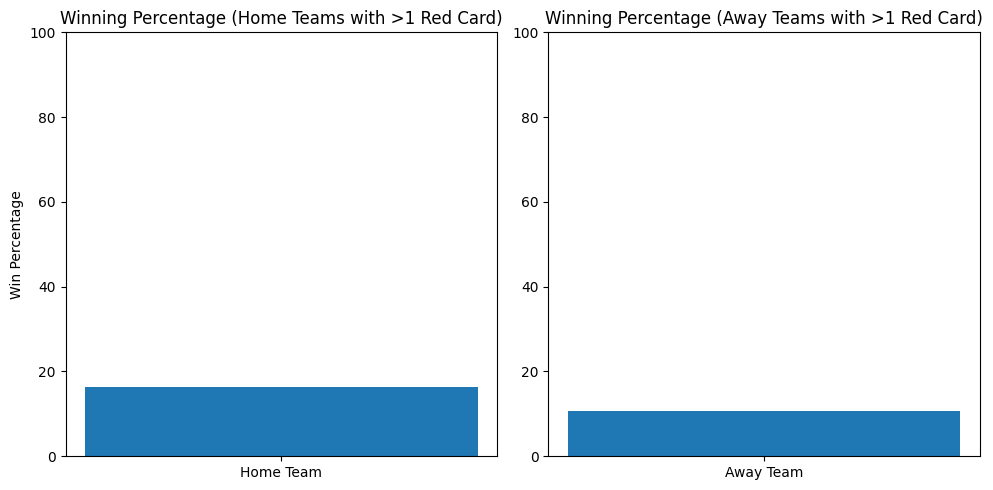

In [10]:
# Filter for matches with more than 1 red card
home_red = m_df[m_df['HomeRed'] > 1]
away_red = m_df[m_df['AwayRed'] > 1]

# Calculate win percentages
home_win_percentage = (home_red['FTResult'] == 'H').mean() * 100
away_win_percentage = (away_red['FTResult'] == 'A').mean() * 100

# Plot the results
plt.figure(figsize=(10, 5))

# Home team plot
plt.subplot(1, 2, 1)
plt.bar(['Home Team'], [home_win_percentage])
plt.title('Winning Percentage (Home Teams with >1 Red Card)')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)

# Away team plot
plt.subplot(1, 2, 2)
plt.bar(['Away Team'], [away_win_percentage])
plt.title('Winning Percentage (Away Teams with >1 Red Card)')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [11]:
m_df['FTResult'].value_counts()

,count
FTResult,
H,101225
A,65369
D,60158


Home winning chances of: 44.64
Away winning chances of: 28.83


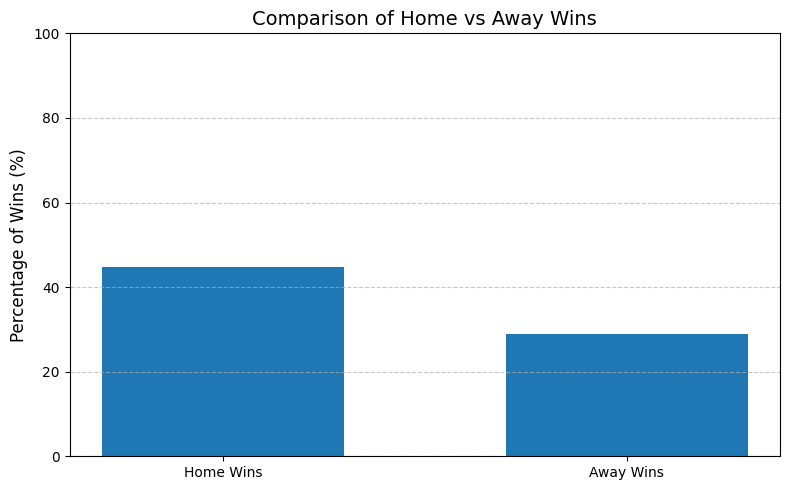

In [12]:
# Calculate win counts
home_wins = (m_df['FTResult'] == 'H').sum()
away_wins = (m_df['FTResult'] == 'A').sum()

# Calculate total matches
total_matches = len(m_df)

# Calculate percentages
home_win_percentage = (home_wins / total_matches) * 100
away_win_percentage = (away_wins / total_matches) * 100

print(f'Home winning chances of: {home_win_percentage:.2f}')
print(f'Away winning chances of: {away_win_percentage:.2f}')

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(['Home Wins', 'Away Wins'], [home_win_percentage, away_win_percentage], width=0.6)
plt.title('Comparison of Home vs Away Wins', fontsize=14)
plt.ylabel('Percentage of Wins (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

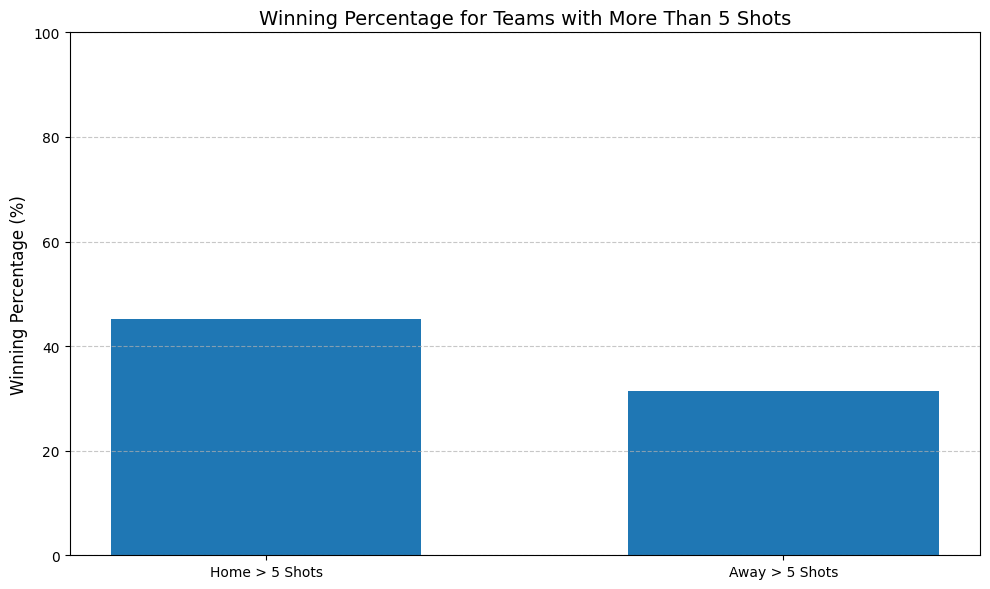

In [13]:
# Filter matches where Home or Away teams had more than 5 shots
home_shots = m_df[m_df['HomeShots'] > 5]
away_shots = m_df[m_df['AwayShots'] > 5]

# Calculate win percentages for these scenarios
home_shots_win_percentage = (home_shots['FTResult'] == 'H').mean() * 100
away_shots_win_percentage = (away_shots['FTResult'] == 'A').mean() * 100

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(['Home > 5 Shots', 'Away > 5 Shots'],
        [home_shots_win_percentage, away_shots_win_percentage], width=0.6)

plt.title('Winning Percentage for Teams with More Than 5 Shots', fontsize=14)
plt.ylabel('Winning Percentage (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
m_df['Division'].unique()

array(['F1', 'F2', 'T1', 'D1', 'D2', 'B1', 'E2', 'E1', 'P1', 'N1', 'E0',
       'I2', 'SP2', 'SP1', 'I1', 'E3', 'SC0', 'SC1', 'SC2', 'SC3', 'G1',
       'EC', 'USA', 'SWE', 'NOR', 'IRL', 'BRA', 'ARG', 'MEX', 'JAP',
       'RUS', 'POL', 'DEN', 'ROM', 'AUT', 'SUI', 'FIN', 'CHN'],
      dtype=object)

In [15]:
yellow_cards_H = m_df['HomeYellow'].sum()
yellow_cards_A = m_df['HomeYellow'].sum()

total_yellow_cards = yellow_cards_H + yellow_cards_A

Red_cards_H = m_df['AwayYellow'].sum()
Red_cards_A = m_df['AwayYellow'].sum()

total_red_cards = Red_cards_H + Red_cards_A

print(f'Total Yellow cards: {total_yellow_cards}\nTotal Red Cards: {total_red_cards}')

Total Yellow cards: 388058.0
Total Red Cards: 457876.0


<Figure size 1000x600 with 0 Axes>

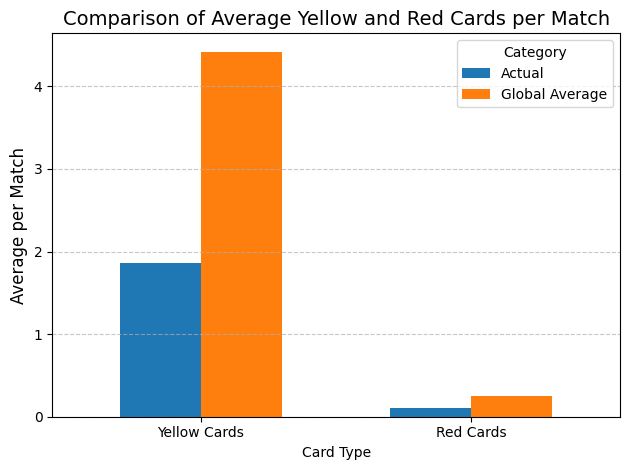

,Card Type,Actual,Global Average,Difference
0,Yellow Cards,1.865304,4.42,-2.554696
1,Red Cards,0.103649,0.25,-0.146351


In [16]:
# Calculate total yellow and red cards
total_yellow_cards = m_df['HomeYellow'].sum() + m_df['AwayYellow'].sum()
total_red_cards = m_df['HomeRed'].sum() + m_df['AwayRed'].sum()

# Calculate total matches played
total_matches = len(m_df)

# Compute actual per match averages
actual_yellow_per_match = total_yellow_cards / total_matches
actual_red_per_match = total_red_cards / total_matches

# Global study averages
global_yellow_avg = 4.42
global_red_avg = 0.25

# Calculate the difference (how much more or less than the global average)
yellow_difference = actual_yellow_per_match - global_yellow_avg
red_difference = actual_red_per_match - global_red_avg

# Prepare data for visualization
comparison_df = pd.DataFrame({
    'Card Type': ['Yellow Cards', 'Red Cards'],
    'Actual': [actual_yellow_per_match, actual_red_per_match],
    'Global Average': [global_yellow_avg, global_red_avg],
    'Difference': [yellow_difference, red_difference]
})

# Plot the results
plt.figure(figsize=(10, 6))
comparison_df.set_index('Card Type')[['Actual', 'Global Average']].plot(kind='bar', width=0.6)
plt.title('Comparison of Average Yellow and Red Cards per Match', fontsize=14)
plt.ylabel('Average per Match', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display numerical differences
from IPython.display import display
display(comparison_df)


In [17]:
m_df['Form3Away'].max()
m_df['Form5Home'].max()

15.0

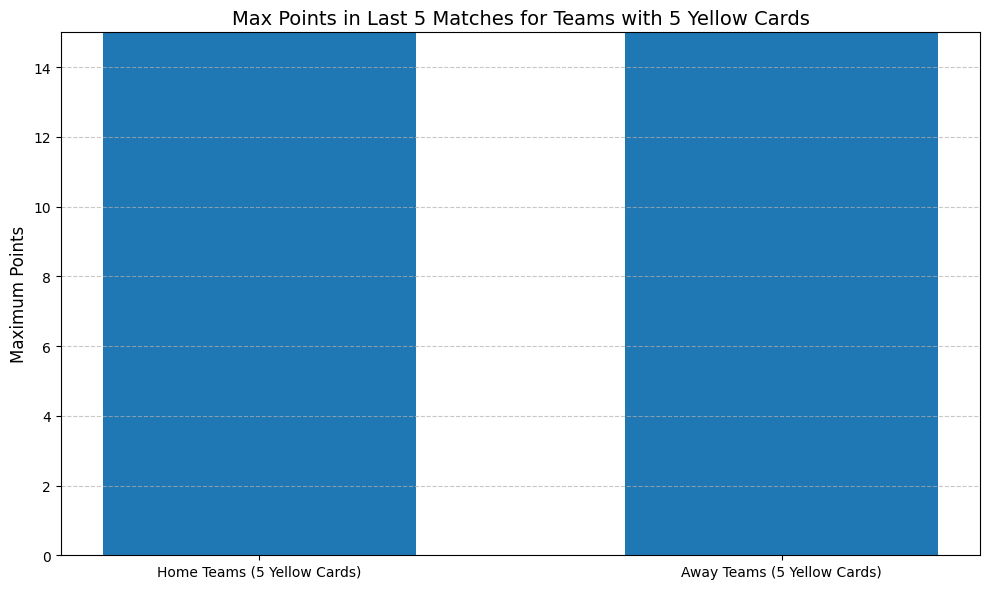

In [18]:
# Filter matches with 5 yellow cards for home and away teams
home_yellow_5 = m_df[m_df['HomeYellow'] == 5]
away_yellow_5 = m_df[m_df['AwayYellow'] == 5]

# Calculate maximum points in the last 5 matches for home and away teams
max_home_points = home_yellow_5['Form5Home'].max()
max_away_points = away_yellow_5['Form5Away'].max()

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(['Home Teams (5 Yellow Cards)', 'Away Teams (5 Yellow Cards)'],
        [max_home_points, max_away_points], width=0.6)

plt.title('Max Points in Last 5 Matches for Teams with 5 Yellow Cards', fontsize=14)
plt.ylabel('Maximum Points', fontsize=12)
plt.ylim(0, 15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

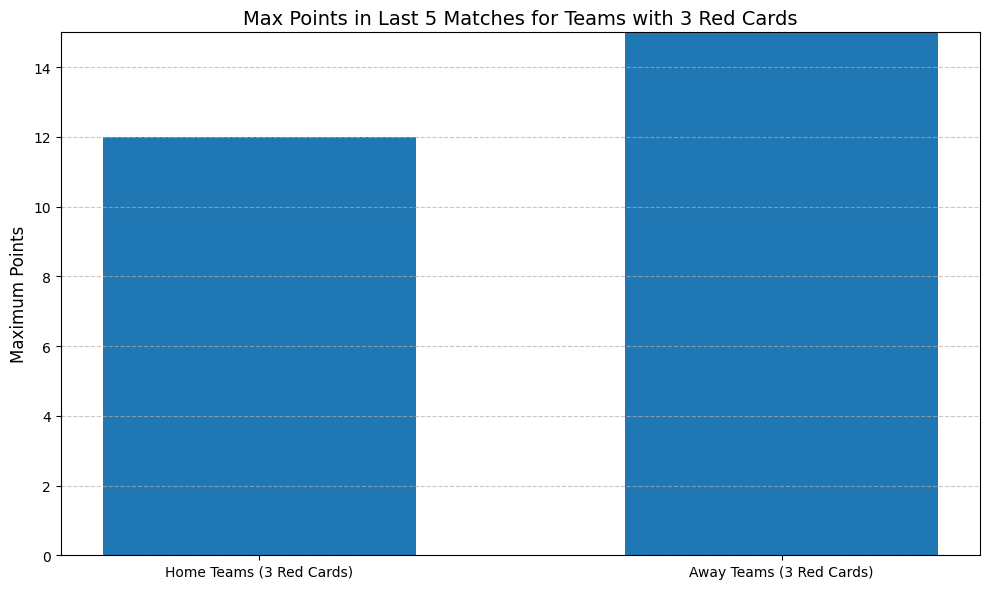

In [19]:
# Filter matches with 3 red cards for home and away teams
home_red_3 = m_df[m_df['HomeRed'] == 3]
away_red_3 = m_df[m_df['AwayRed'] == 3]

# Calculate maximum points in the last 5 matches for home and away teams
max_home_points_red = home_red_3['Form5Home'].max()
max_away_points_red = away_red_3['Form5Away'].max()

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(['Home Teams (3 Red Cards)', 'Away Teams (3 Red Cards)'],
        [max_home_points_red, max_away_points_red], width=0.6)

plt.title('Max Points in Last 5 Matches for Teams with 3 Red Cards', fontsize=14)
plt.ylabel('Maximum Points', fontsize=12)
plt.ylim(0, 15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


,Year,HomeElo,AwayElo
0,2000,1551.547888,1551.241492
1,2001,1552.717805,1553.066254
2,2002,1544.366886,1543.924149
3,2003,1560.907097,1562.029936
4,2004,1550.766478,1550.255297


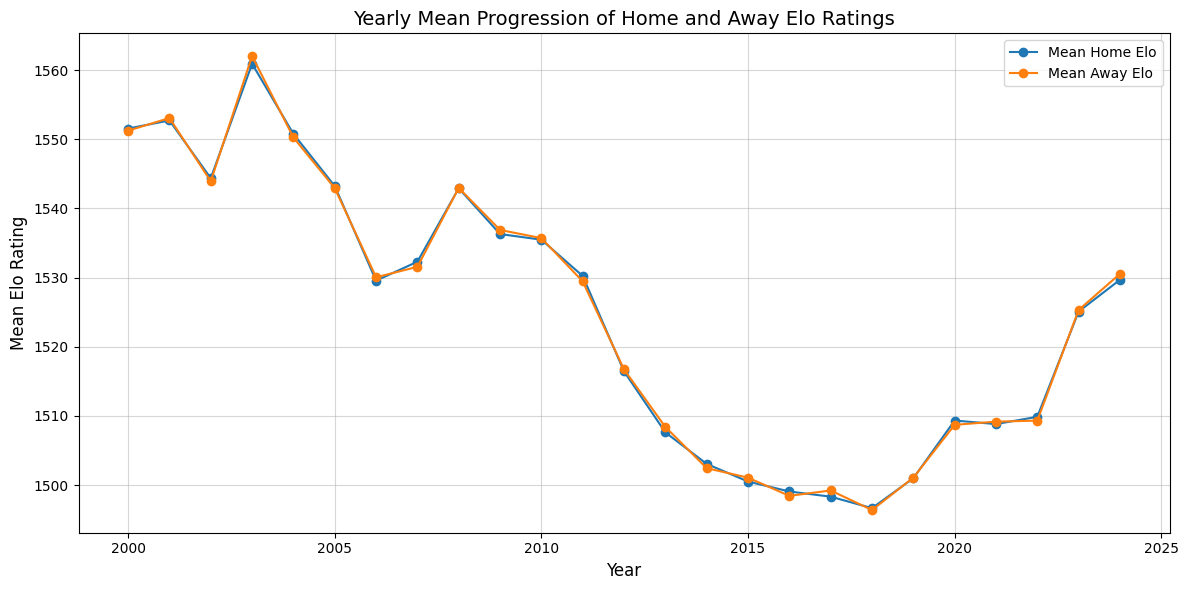

In [20]:
# Convert MatchDate to datetime and extract the year
m_df['Year'] = m_df['MatchDate'].dt.year

# Calculate yearly means for HomeElo and AwayElo
mean_elo = m_df.groupby('Year')[['HomeElo', 'AwayElo']].mean().reset_index()
display(mean_elo.head())

# Plot Elo ratings progression using yearly means
plt.figure(figsize=(12, 6))

# Home Elo ratings mean
plt.plot(mean_elo['Year'], mean_elo['HomeElo'], label='Mean Home Elo', marker='o')
# Away Elo ratings mean
plt.plot(mean_elo['Year'], mean_elo['AwayElo'], label='Mean Away Elo', marker='o')

# Titles and labels
plt.title('Yearly Mean Progression of Home and Away Elo Ratings', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Elo Rating', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

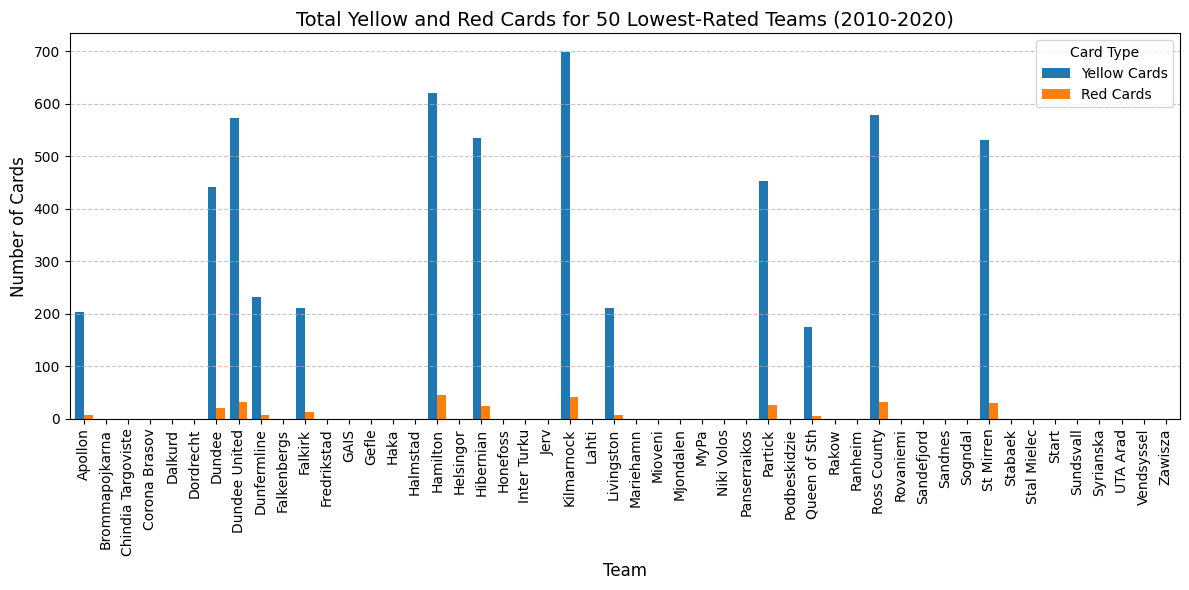

In [21]:
# Filter data for years between 2010 and 2020
filtered_matches = m_df[(m_df['Year'] >= 2010) & (m_df['Year'] <= 2020)]

# Calculate the average Elo rating for each team
elo_ratings = (
    filtered_matches.groupby('HomeTeam')['HomeElo'].mean() +
    filtered_matches.groupby('AwayTeam')['AwayElo'].mean()
)

# Get the top 50 teams with the lowest Elo ratings
lowest_elo_teams = elo_ratings.nsmallest(50).index

# Filter the yellow and red cards data for these teams only
yellow_cards = (
    filtered_matches[filtered_matches['HomeTeam'].isin(lowest_elo_teams)].groupby('HomeTeam')['HomeYellow'].sum() +
    filtered_matches[filtered_matches['AwayTeam'].isin(lowest_elo_teams)].groupby('AwayTeam')['AwayYellow'].sum()
)
red_cards = (
    filtered_matches[filtered_matches['HomeTeam'].isin(lowest_elo_teams)].groupby('HomeTeam')['HomeRed'].sum() +
    filtered_matches[filtered_matches['AwayTeam'].isin(lowest_elo_teams)].groupby('AwayTeam')['AwayRed'].sum()
)

# Correctly combine results into a single DataFrame
cards_summary = pd.DataFrame({
    'Team': yellow_cards.index,
    'Yellow Cards': yellow_cards.values,
    'Red Cards': red_cards.values
}).reset_index(drop=True)

# Plot the results for the top 50 lowest-rated teams
plt.figure(figsize=(12, 6))
cards_summary.plot(
    x='Team',
    y=['Yellow Cards', 'Red Cards'],
    kind='bar',
    figsize=(12, 6),
    width=0.8
)
plt.title('Total Yellow and Red Cards for 50 Lowest-Rated Teams (2010-2020)', fontsize=14)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of Cards', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Card Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
cards_summary

,Team,Yellow Cards,Red Cards
0,Apollon,204.0,8.0
1,Brommapojkarna,0.0,0.0
2,Chindia Targoviste,0.0,0.0
3,Corona Brasov,0.0,0.0
4,Dalkurd,0.0,0.0
5,Dordrecht,0.0,0.0
6,Dundee,441.0,20.0
7,Dundee United,572.0,32.0
8,Dunfermline,232.0,8.0
9,Falkenbergs,0.0,0.0


<Figure size 1200x600 with 0 Axes>

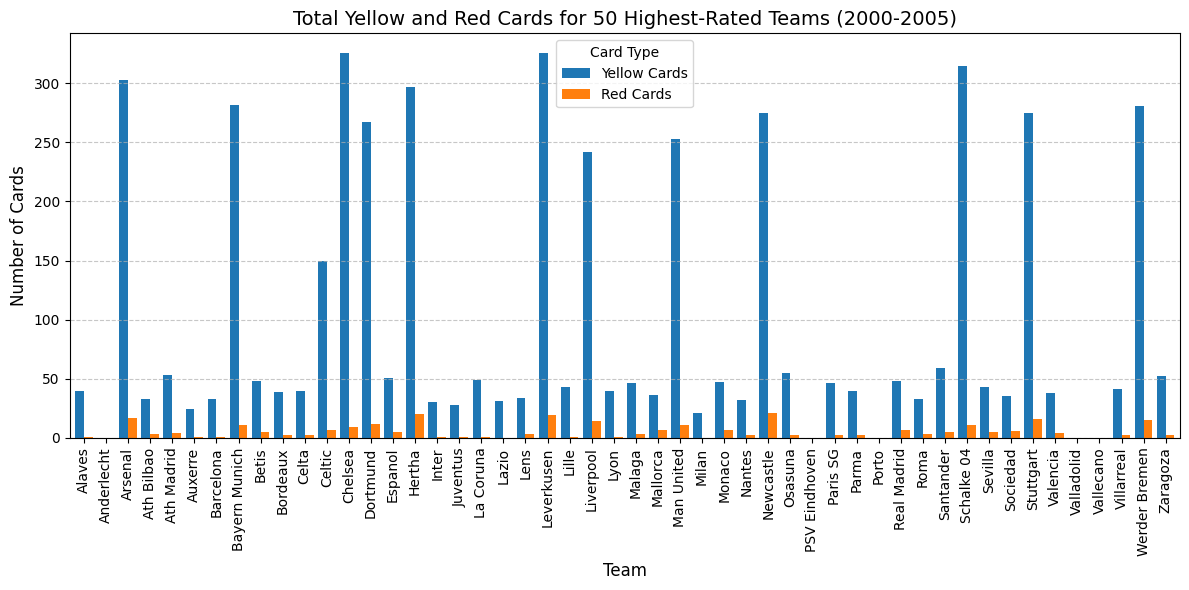

In [23]:
# Filter data for years between 2000 and 2005
filtered_matches = m_df[(m_df['Year'] >= 2000) & (m_df['Year'] <= 2005)]

# Calculate the average Elo rating for each team
elo_ratings = (
    filtered_matches.groupby('HomeTeam')['HomeElo'].mean() +
    filtered_matches.groupby('AwayTeam')['AwayElo'].mean()
)

# Get the top 50 teams with the highest Elo ratings
highest_elo_teams = elo_ratings.nlargest(50).index  # Use nlargest instead of nsmallest

# Filter the yellow and red cards data for these teams only
yellow_cards = (
    filtered_matches[filtered_matches['HomeTeam'].isin(highest_elo_teams)].groupby('HomeTeam')['HomeYellow'].sum() +
    filtered_matches[filtered_matches['AwayTeam'].isin(highest_elo_teams)].groupby('AwayTeam')['AwayYellow'].sum()
)
red_cards = (
    filtered_matches[filtered_matches['HomeTeam'].isin(highest_elo_teams)].groupby('HomeTeam')['HomeRed'].sum() +
    filtered_matches[filtered_matches['AwayTeam'].isin(highest_elo_teams)].groupby('AwayTeam')['AwayRed'].sum()
)

# Combine results into a single DataFrame
cards_summary = pd.DataFrame({
    'Team': yellow_cards.index,
    'Yellow Cards': yellow_cards.values,
    'Red Cards': red_cards.values
}).reset_index(drop=True)

# Plot the results for the top 50 highest-rated teams
plt.figure(figsize=(12, 6))
cards_summary.plot(
    x='Team',
    y=['Yellow Cards', 'Red Cards'],
    kind='bar',
    figsize=(12, 6),
    width=0.8
)
plt.title('Total Yellow and Red Cards for 50 Highest-Rated Teams (2000-2005)', fontsize=14)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of Cards', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Card Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [24]:
m_df.head()

,Division,MatchDate,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,...,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,Year
0,F1,2000-07-28,Marseille,Troyes,1691.36,1581.55,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000
1,F1,2000-07-28,Paris SG,Strasbourg,1720.51,1636.89,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000
2,F2,2000-07-28,Wasquehal,Nancy,1458.77,1640.12,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000
3,F2,2000-07-29,Ajaccio,Le Mans,1476.65,1472.12,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000
4,F2,2000-07-29,Beauvais,Montpellier,1414.12,1614.09,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000


In [25]:
m_df[['HomeFouls', 'AwayFouls']].dtypes

,0
HomeFouls,float64
AwayFouls,float64


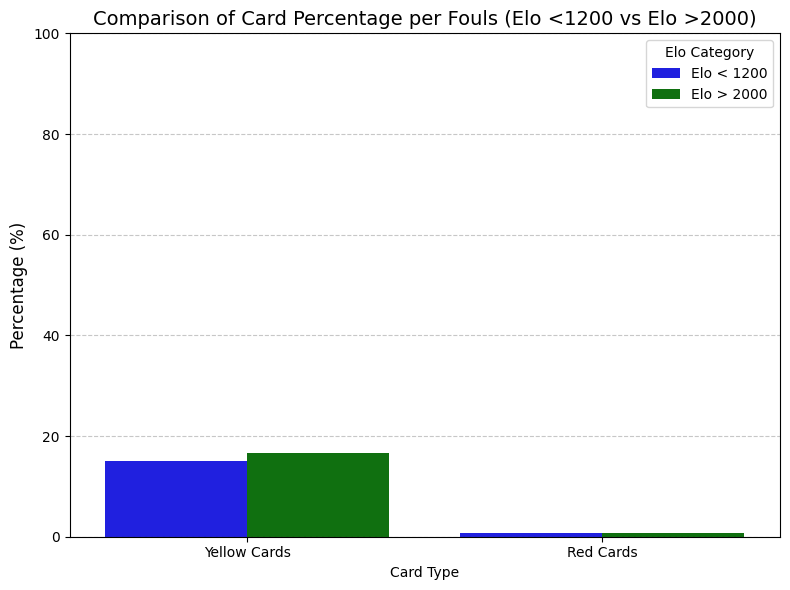

In [26]:
# Separate data for teams with Elo < 1200 and Elo > 2000
low_elo_matches = m_df[(m_df['HomeElo'] < 1200) | (m_df['AwayElo'] < 1200)]
high_elo_matches = m_df[(m_df['HomeElo'] > 2000) | (m_df['AwayElo'] > 2000)]

# Calculate total fouls for each group
total_fouls_low = (low_elo_matches['HomeFouls'] + low_elo_matches['AwayFouls']).sum()
total_fouls_high = (high_elo_matches['HomeFouls'] + high_elo_matches['AwayFouls']).sum()

# Calculate total cards for each group
total_yellow_low = (low_elo_matches['HomeYellow'] + low_elo_matches['AwayYellow']).sum()
total_red_low = (low_elo_matches['HomeRed'] + low_elo_matches['AwayRed']).sum()

total_yellow_high = (high_elo_matches['HomeYellow'] + high_elo_matches['AwayYellow']).sum()
total_red_high = (high_elo_matches['HomeRed'] + high_elo_matches['AwayRed']).sum()

# Calculate percentages
yellow_percentage_low = (total_yellow_low / total_fouls_low) * 100 if total_fouls_low > 0 else 0
red_percentage_low = (total_red_low / total_fouls_low) * 100 if total_fouls_low > 0 else 0

yellow_percentage_high = (total_yellow_high / total_fouls_high) * 100 if total_fouls_high > 0 else 0
red_percentage_high = (total_red_high / total_fouls_high) * 100 if total_fouls_high > 0 else 0

# Prepare combined data for visualization
combined_card_percentages = pd.DataFrame({
    'Card Type': ['Yellow Cards', 'Red Cards', 'Yellow Cards', 'Red Cards'],
    'Elo Category': ['Elo < 1200', 'Elo < 1200', 'Elo > 2000', 'Elo > 2000'],
    'Percentage': [yellow_percentage_low, red_percentage_low, yellow_percentage_high, red_percentage_high]
})

# Plot combined bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Card Type', y='Percentage', hue='Elo Category', data=combined_card_percentages, palette=['blue', 'green'])
plt.title('Comparison of Card Percentage per Fouls (Elo <1200 vs Elo >2000)', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Elo Category")
plt.tight_layout()
plt.show()


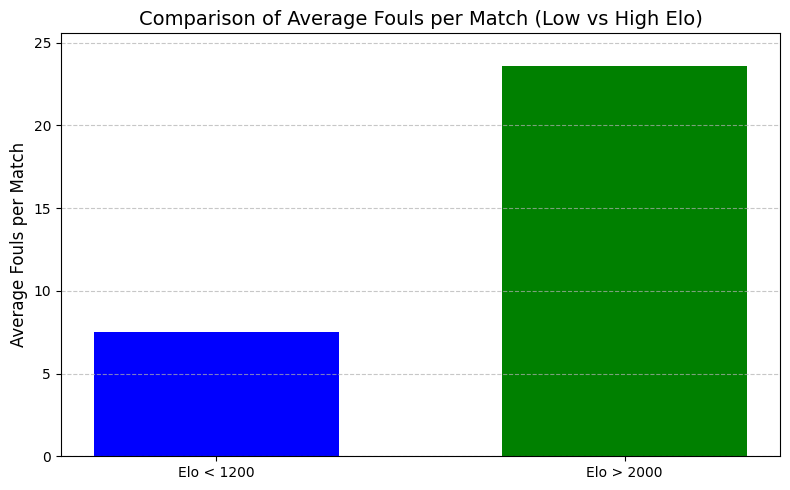

,Elo Category,Average Fouls per Match
0,Elo < 1200,7.511714
1,Elo > 2000,23.559708


In [27]:
# Calculate total fouls for each group
avg_fouls_low_elo = (low_elo_matches['HomeFouls'].sum() + low_elo_matches['AwayFouls'].sum()) / len(low_elo_matches)
avg_fouls_high_elo = (high_elo_matches['HomeFouls'].sum() + high_elo_matches['AwayFouls'].sum()) / len(high_elo_matches)

# Prepare data for visualization
fouls_comparison = pd.DataFrame({
    'Elo Category': ['Elo < 1200', 'Elo > 2000'],
    'Average Fouls per Match': [avg_fouls_low_elo, avg_fouls_high_elo]
})

# Plot the comparison
plt.figure(figsize=(8, 5))
plt.bar(fouls_comparison['Elo Category'], fouls_comparison['Average Fouls per Match'], width=0.6, color=['blue', 'green'])
plt.title('Comparison of Average Fouls per Match (Low vs High Elo)', fontsize=14)
plt.ylabel('Average Fouls per Match', fontsize=12)
plt.ylim(0, max(fouls_comparison['Average Fouls per Match']) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display numerical results
display(fouls_comparison)


Correlation Matrix:


,HomeElo,AwayElo,HomeFouls,AwayFouls,HomeYellow,AwayYellow,HomeRed,AwayRed
HomeElo,1.000000,-0.833305,-0.317895,0.236478,-0.286002,0.188738,-0.089528,0.035783
AwayElo,-0.833305,1.000000,0.376610,-0.195353,0.383191,-0.054824,0.102374,-0.026318
HomeFouls,-0.317895,0.376610,1.000000,0.131901,0.512559,0.160720,0.133391,0.054578
AwayFouls,0.236478,-0.195353,0.131901,1.000000,0.067636,0.420807,0.019984,0.108677
HomeYellow,-0.286002,0.383191,0.512559,0.067636,1.000000,0.246663,0.140288,0.051234
AwayYellow,0.188738,-0.054824,0.160720,0.420807,0.246663,1.000000,0.113272,0.111105
HomeRed,-0.089528,0.102374,0.133391,0.019984,0.140288,0.113272,1.000000,0.009737
AwayRed,0.035783,-0.026318,0.054578,0.108677,0.051234,0.111105,0.009737,1.000000


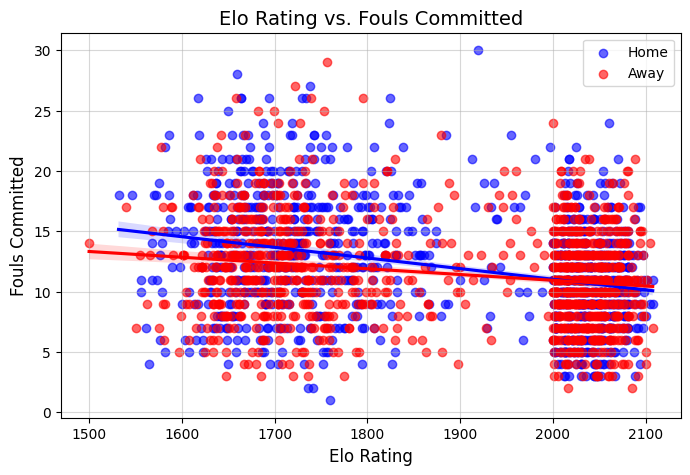

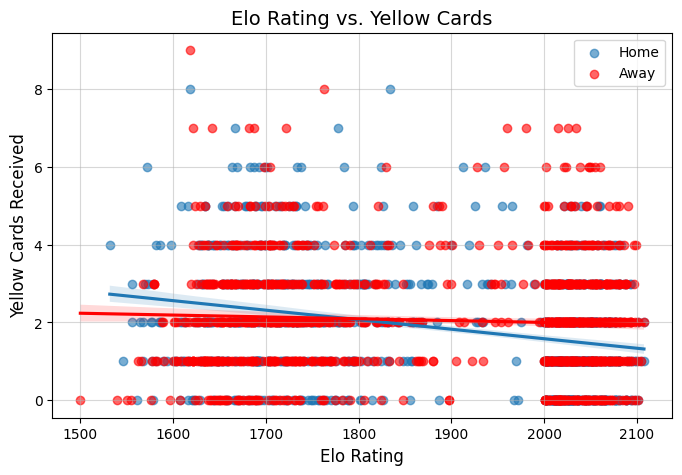

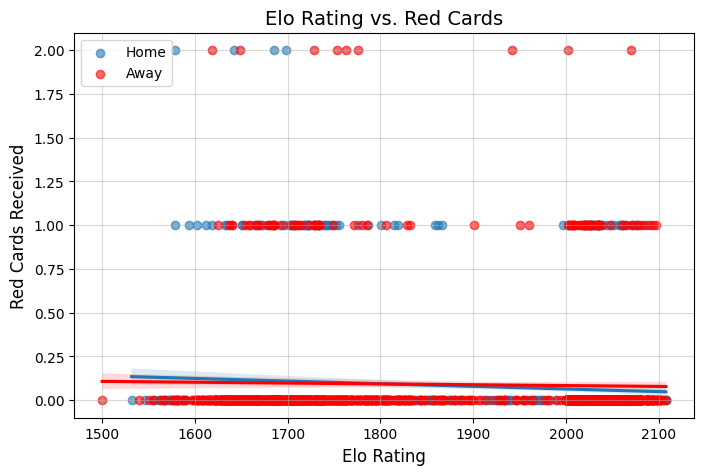

In [28]:
# Filter only high Elo teams (Elo > 2000)
high_elo_teams = m_df[(m_df['HomeElo'] > 2000) | (m_df['AwayElo'] > 2000)]

# Compute correlation matrix for Elo, Fouls, and Cards
correlation_matrix = high_elo_teams[['HomeElo', 'AwayElo', 'HomeFouls', 'AwayFouls', 'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed']].corr()

# Display correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

# Elo vs. Fouls
plt.figure(figsize=(8, 5))
sns.regplot(x=high_elo_teams['HomeElo'], y=high_elo_teams['HomeFouls'], scatter_kws={'alpha':0.6}, label='Home', color='blue')
sns.regplot(x=high_elo_teams['AwayElo'], y=high_elo_teams['AwayFouls'], scatter_kws={'alpha':0.6}, label='Away', color='red')
plt.title("Elo Rating vs. Fouls Committed", fontsize=14)
plt.xlabel("Elo Rating", fontsize=12)
plt.ylabel("Fouls Committed", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

# Elo vs. Yellow Cards
plt.figure(figsize=(8, 5))
sns.regplot(x=high_elo_teams['HomeElo'], y=high_elo_teams['HomeYellow'], scatter_kws={'alpha':0.6}, label='Home')
sns.regplot(x=high_elo_teams['AwayElo'], y=high_elo_teams['AwayYellow'], scatter_kws={'alpha':0.6}, label='Away', color='red')
plt.title("Elo Rating vs. Yellow Cards", fontsize=14)
plt.xlabel("Elo Rating", fontsize=12)
plt.ylabel("Yellow Cards Received", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

# Elo vs. Red Cards
plt.figure(figsize=(8, 5))
sns.regplot(x=high_elo_teams['HomeElo'], y=high_elo_teams['HomeRed'], scatter_kws={'alpha':0.6}, label='Home')
sns.regplot(x=high_elo_teams['AwayElo'], y=high_elo_teams['AwayRed'], scatter_kws={'alpha':0.6}, label='Away', color='red')
plt.title("Elo Rating vs. Red Cards", fontsize=14)
plt.xlabel("Elo Rating", fontsize=12)
plt.ylabel("Red Cards Received", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

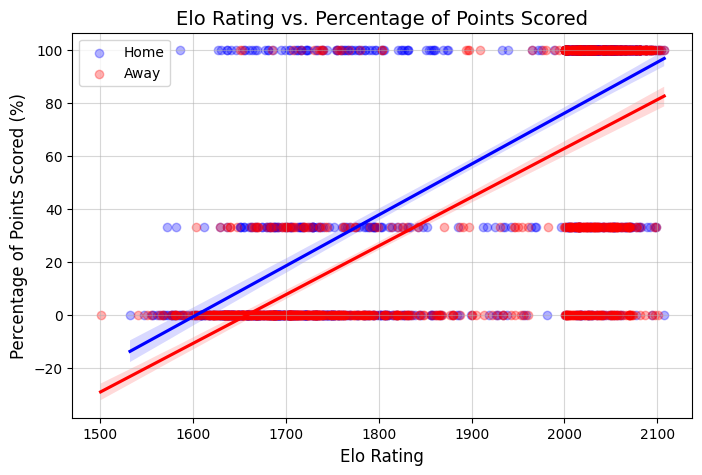

In [29]:
# Calculate points earned based on match results
m_df['HomePoints'] = m_df['FTResult'].apply(lambda x: 3 if x == 'H' else (1 if x == 'D' else 0))
m_df['AwayPoints'] = m_df['FTResult'].apply(lambda x: 3 if x == 'A' else (1 if x == 'D' else 0))

# Calculate percentage of points scored (Max possible: 3 points per match)
m_df['HomePointsPercentage'] = (m_df['HomePoints'] / 3) * 100
m_df['AwayPointsPercentage'] = (m_df['AwayPoints'] / 3) * 100

# Now filter only high Elo teams (Elo > 2000) **after** calculations
high_elo_teams = m_df[(m_df['HomeElo'] > 2000) | (m_df['AwayElo'] > 2000)]

# Elo vs. Points Percentage (Scatter + Regression Line)
plt.figure(figsize=(8, 5))
sns.regplot(x=high_elo_teams['HomeElo'], y=high_elo_teams['HomePointsPercentage'], scatter=True, scatter_kws={'alpha':0.3}, label='Home', color='blue')
sns.regplot(x=high_elo_teams['AwayElo'], y=high_elo_teams['AwayPointsPercentage'], scatter=True, scatter_kws={'alpha':0.3}, label='Away', color='red')
plt.title("Elo Rating vs. Percentage of Points Scored", fontsize=14)
plt.xlabel("Elo Rating", fontsize=12)
plt.ylabel("Percentage of Points Scored (%)", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()
